<h2>The telecom churn data from <a href="https://www.kaggle.com/viteshkhanna/telecom-churn">Kaggle</a> will be used throughout this exercise</h2>

Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<b>Reading data into a pandas dataframe and display the first 10 rows of the dataframe</b>

In [2]:
df_churn = pd.read_csv("/Users/palimasenkane/Downloads/telecom_churn (1).csv")
df_churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


<h2>Data Pre-processing</h2>

In [3]:
#Determine how many of each is Churn column
df_churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [36]:
#dropping all na values
df_churn.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,2,84.80,1990.50,0
7039,0,0,1,1,72,1,1,2,2,103.20,7362.90,0
7040,0,0,1,1,11,0,2,1,1,29.60,346.45,0
7041,1,1,1,0,4,1,1,2,1,74.40,306.60,1


In [4]:
#find the size of the dataset
df_churn.shape

(7043, 21)

In [5]:
#Cleaning the data by removing unnecesary/unwanted columns
df_churn.drop(['customerID','OnlineSecurity'],axis=1,inplace=True)
df_churn.drop(['OnlineBackup','DeviceProtection','TechSupport'],axis=1,inplace=True)
df_churn.drop(['StreamingTV','StreamingMovies','PaperlessBilling','PaymentMethod'],axis=1,inplace=True)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,Month-to-month,70.70,151.65,Yes


In [83]:
#Check the information of the stored data
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           7043 non-null   int64  
 1   SeniorCitizen    7043 non-null   int64  
 2   Partner          7043 non-null   int64  
 3   Dependents       7043 non-null   int64  
 4   tenure           7043 non-null   int64  
 5   PhoneService     7043 non-null   int64  
 6   MultipleLines    7043 non-null   int64  
 7   InternetService  7043 non-null   int64  
 8   Contract         7043 non-null   int64  
 9   MonthlyCharges   7043 non-null   float64
 10  TotalCharges     7043 non-null   float64
 11  Churn            7043 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 660.4 KB


In [7]:
#Convert categorical values to numerical values
df_churn['gender'].replace('Female', 0,inplace=True)
df_churn['gender'].replace('Male', 1,inplace=True)

df_churn['Partner'].replace('No', 0,inplace=True)
df_churn['Partner'].replace('Yes', 1,inplace=True)

df_churn['Dependents'].replace('No', 0,inplace=True)
df_churn['Dependents'].replace('Yes', 1,inplace=True)

df_churn['PhoneService'].replace('No', 0,inplace=True)
df_churn['PhoneService'].replace('Yes', 1,inplace=True)

df_churn['MultipleLines'].replace('No', 0,inplace=True)
df_churn['MultipleLines'].replace('No phone service',2,inplace=True)
df_churn['MultipleLines'].replace('Yes', 1,inplace=True)

df_churn['InternetService'].replace('DSL', 1,inplace=True)
df_churn['InternetService'].replace('Fiber optic', 2,inplace=True)
df_churn['InternetService'].replace('No', 3,inplace=True)

df_churn['Contract'].replace('Month-to-month', 1,inplace=True)
df_churn['Contract'].replace('One year', 2,inplace=True)
df_churn['Contract'].replace('Two year',3, inplace=True)

df_churn['Churn'].replace('No', 0,inplace=True)
df_churn['Churn'].replace('Yes', 1,inplace=True)
#Converting object data types to float
df_churn['gender'] = df_churn['gender'].astype(int, errors = 'raise')
df_churn['SeniorCitizen'] = df_churn['SeniorCitizen'].astype(int, errors = 'raise')
df_churn['Partner'] = df_churn['Partner'].astype(int, errors = 'raise')
df_churn['Dependents'] = df_churn['Dependents'].astype(int, errors = 'raise')
df_churn['PhoneService'] = df_churn['PhoneService'].astype(int, errors = 'raise')
df_churn['MultipleLines'] = df_churn['MultipleLines'].astype(int, errors = 'raise')
df_churn['InternetService'] = df_churn['InternetService'].astype(int, errors = 'raise')
df_churn['Contract'] = df_churn['Contract'].astype(int, errors = 'raise')
df_churn['Churn'] = df_churn['Churn'].astype(int, errors = 'raise')

In [84]:
#confirm that the changes have taken place
df_churn.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,2,1,2,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,1,70.70,151.65,1
5,0,0,0,0,8,1,1,2,1,99.65,820.50,1
6,1,0,0,1,22,1,1,2,1,89.10,1949.40,0
7,0,0,0,0,10,0,2,1,1,29.75,301.90,0
8,0,0,1,0,28,1,1,2,1,104.80,3046.05,1
9,1,0,0,1,62,1,0,1,2,56.15,3487.95,0


<b>Feature extraction</b>: Seperating the predictor varables (X) from the target varibale(y)

In [85]:
#Seperate the Independent variaables from the response variable and convert the dataframe into a numpy array.
X = np.asarray(df_churn[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','Contract','MonthlyCharges','TotalCharges']])
y=np.asarray(df_churn['Churn'])
print(X[0:5])
print(y[0:5])

[[0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00
  2.00000e+00 1.00000e+00 1.00000e+00 2.98500e+01 2.98500e+01]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 3.40000e+01 1.00000e+00
  0.00000e+00 1.00000e+00 2.00000e+00 5.69500e+01 1.88950e+03]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 2.00000e+00 1.00000e+00
  0.00000e+00 1.00000e+00 1.00000e+00 5.38500e+01 1.08150e+02]
 [1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 4.50000e+01 0.00000e+00
  2.00000e+00 1.00000e+00 2.00000e+00 4.23000e+01 1.84075e+03]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 2.00000e+00 1.00000e+00
  0.00000e+00 2.00000e+00 1.00000e+00 7.07000e+01 1.51650e+02]]
[0 0 1 0 1]


Standardisation and normalisation of the dataset

In [10]:
#Standardisation and Normalisation of the dataset
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.00955867, -0.43991649,  1.03453023, -0.65401193, -1.27744458,
        -3.05401039,  2.11053526, -1.18323364, -0.8282069 , -1.16032292,
        -0.99266722],
       [ 0.99053183, -0.43991649, -0.96662231, -0.65401193,  0.06632742,
         0.32743831, -0.93828021, -1.18323364,  0.37127103, -0.25962894,
        -0.17219813],
       [ 0.99053183, -0.43991649, -0.96662231, -0.65401193, -1.23672422,
         0.32743831, -0.93828021, -1.18323364, -0.8282069 , -0.36266036,
        -0.95812162],
       [ 0.99053183, -0.43991649, -0.96662231, -0.65401193,  0.51425142,
        -3.05401039,  2.11053526, -1.18323364,  0.37127103, -0.74653546,
        -0.19370641],
       [-1.00955867, -0.43991649, -0.96662231, -0.65401193, -1.23672422,
         0.32743831, -0.93828021,  0.17225018, -0.8282069 ,  0.19736523,
        -0.93892962]])

<b>Imbalance in the dataset<b/> : The data shows a 73%(No) to 27%(Yes) imbalance. Undersampling method is used to manage this situation

In [11]:
#Managing the imbalance in the dataset using undersamping
#pip install -U imbalanced-learn -y
#conda install -c conda-forge imbalanced-learn -y
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import warnings
from sklearn import preprocessing
warnings.simplefilter(action='ignore', category=FutureWarning)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=4)
print("Before undersampling: ", X_train.shape, y_train.shape)
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("After undersampling: ", X_train_under.shape,y_train_under.shape)

Before undersampling:  (5634, 11) (5634,)
After undersampling:  (2990, 11) (2990,)


<h2>The Models Training and Evaluation</h2>
1. Support Vector Machine (SVM) traning(Radial Basis Function kernel)

In [67]:
#Support Vector Machine(SVM) Model trainining
# import SVM libraries 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score,jaccard_score,r2_score,f1_score,accuracy_score

svc_model=SVC(kernel='rbf')
clf_under = svc_model.fit(X_train_under, y_train_under)
clf_under

SVC()

SVM Predicition and Evaluation

In [68]:
#Prediciton with SVM model
pred_under = clf_under.predict(X_test)
pred_under
#SVM prediction accuracy
print('Train accuracy %s' % svc_model.score(X_train_under, y_train_under)) 
print('Test accuracy %s' % accuracy_score(pred_under, y_test)) 
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))
print("Jaccard score for the undersampled data:",jaccard_score(y_test,pred_under,pos_label=0))
print('Residual Sum of Squares(MSE):%.2f'%np.mean(pred_under - y_test)**2)
print('R2_score: %.2f'%r2_score(y_test,pred_under))
print("F1_score: %.2f"%f1_score(y_test,pred_under,average='weighted'))
print(classification_report(y_test,pred_under))

Train accuracy 0.7722408026755853
Test accuracy 0.7210787792760823
ROC AUC score for undersampled data:  0.7324485261825416
Jaccard score for the undersampled data: 0.6509769094138543
Residual Sum of Squares(MSE):0.02
R2_score: -0.43
F1_score: 0.74
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1035
           1       0.48      0.76      0.59       374

    accuracy                           0.72      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.72      0.74      1409



[[730 305]
 [ 89 285]]


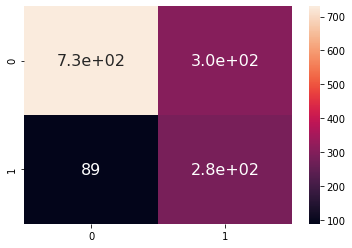

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true=y_test,y_pred=pred_under)
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True,annot_kws={"size":16})
plt.show()

The Support Vector Machine(SVM)(Polynomial kernel)

In [69]:
svc_model2=SVC(kernel='poly', degree=1)
clf_under = svc_model2.fit(X_train_under, y_train_under)
clf_under

SVC(degree=1, kernel='poly')

Prediction and Evaluation (SVM - polynomial kernel)

In [70]:
pred_under = clf_under.predict(X_test)
pred_under
#SVM prediction accuracy
print('Train accuracy %s' % svc_model2.score(X_train_under, y_train_under)) 
print('Test accuracy %s' % accuracy_score(pred_under, y_test))
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, pred_under))
print("Jaccard score for the undersampled data:",jaccard_score(y_test,pred_under,pos_label=0))
print('Residual Sum of Squares(MSE):%.2f'%np.mean(pred_under - y_test)**2)
print('R2_score: %.2f'%r2_score(y_test,pred_under))
print("F1_score: %.2f"%f1_score(y_test,pred_under,average='weighted'))
print(classification_report(y_test,pred_under))

Train accuracy 0.7665551839464882
Test accuracy 0.6884315117104329
ROC AUC score for undersampled data:  0.7264486295176833
Jaccard score for the undersampled data: 0.6034327009936766
Residual Sum of Squares(MSE):0.04
R2_score: -0.60
F1_score: 0.71
              precision    recall  f1-score   support

           0       0.90      0.65      0.75      1035
           1       0.45      0.81      0.58       374

    accuracy                           0.69      1409
   macro avg       0.68      0.73      0.67      1409
weighted avg       0.78      0.69      0.71      1409



2. K-Nearest Neighbor (KNN) model Training

In [14]:
#K-Nearest Neighbors Model Training
from sklearn.neighbors import KNeighborsClassifier
k=4
neighbor = KNeighborsClassifier(n_neighbors=k).fit(X_train_under,y_train_under)
neighbor

KNeighborsClassifier(n_neighbors=4)

Prediction with KNN

In [15]:
#Predition with KNN
yhat= neighbor.predict(X_test)
yhat[0:5]

array([1, 0, 0, 1, 0])

KNN Model Evaluation with k=4

In [71]:
#KNN model accuracy with k=4
print('Train accuracy %s' % neighbor.score(X_train_under, y_train_under)) 
print('Test accuracy %s' % accuracy_score(yhat, y_test))
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, yhat))
print("Jaccard score for the undersampled data:",jaccard_score(y_test,yhat,pos_label=0))
print('Residual Sum of Squares(MSE):%.2f'%np.mean(yhat - y_test)**2)
print('R2_score: %.2f'%r2_score(y_test,yhat))
print("F1_score: %.2f"%f1_score(y_test,yhat,average='weighted'))
print(classification_report(y_test,yhat))

Train accuracy 0.7759197324414716
Test accuracy 0.6997870830376153
ROC AUC score for undersampled data:  0.7333242915084348
Jaccard score for the undersampled data: 0.618231046931408
Residual Sum of Squares(MSE):0.04
R2_score: -0.54
F1_score: 0.72
              precision    recall  f1-score   support

           0       0.90      0.66      0.76      1035
           1       0.46      0.80      0.59       374

    accuracy                           0.70      1409
   macro avg       0.68      0.73      0.68      1409
weighted avg       0.79      0.70      0.72      1409



Calculating the accuracy of the KNN model using different values of K

In [17]:
#Calculate the accuracy of KNN for different values of k
from sklearn import metrics
k=10
mean_all = np.zeros((k-1))
std_all = np.zeros((k-1))
for n in range(1,k):
    neighbor2 = KNeighborsClassifier(n_neighbors=n).fit(X_train_under,y_train_under)
    yhat2= neighbor2.predict(X_test)
mean_all[n-1] = metrics.accuracy_score(y_test,yhat2)
std_all[n-1] = np.std(yhat2==y_test)/np.sqrt(yhat2.shape[0])
mean_all


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.71043293])

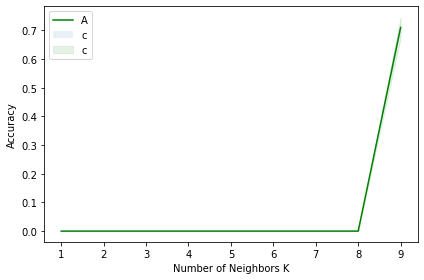

In [18]:
#plot the model accuracy for these number of k.
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(1,k),mean_all,'g')
plt.fill_between(range(1,k), mean_all-1*std_all,mean_all+1*std_all,alpha=0.10)
plt.fill_between(range(1,k),mean_all-3*std_all,mean_all+3*std_all,alpha=0.10,color='green')
plt.legend('Accuracy +/- 1*std,+/-3*std')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors K')
plt.tight_layout()
plt.show()

K=8 is the best value of K. The KNN model is therefore trained using k=8

In [19]:
# K=8 is the most accurate. Let's train the KNN model with it.
#K-Nearest Neighbors Model Training
from sklearn.neighbors import KNeighborsClassifier
k=8
neighbor = KNeighborsClassifier(n_neighbors=k).fit(X_train_under,y_train_under)
neighbor

KNeighborsClassifier(n_neighbors=8)

Prediction with KNN(k=8)

In [73]:
#Predition with KNN
yhat_8= neighbor.predict(X_test)
yhat_8[0:10]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1])

KNN Model accurancy (k=8)

In [74]:
#KNN model accuracy with k=8
print('Train accuracy %s' % neighbor.score(X_train_under, y_train_under)) 
print('Test accuracy %s' % accuracy_score(yhat_8, y_test))
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, yhat_8))
print("Jaccard score for the undersampled data:",jaccard_score(y_test,yhat_8,pos_label=0))
print('Residual Sum of Squares(MSE):%.2f'%np.mean(yhat_8 - y_test)**2)
print('R2_score: %.2f'%r2_score(y_test,yhat_8))
print("F1_score: %.2f"%f1_score(y_test,yhat_8,average='weighted'))
print(classification_report(y_test,yhat_8))

Train accuracy 0.7759197324414716
Test accuracy 0.7331440738112136
ROC AUC score for undersampled data:  0.7150468883205456
Jaccard score for the undersampled data: 0.6747404844290658
Residual Sum of Squares(MSE):0.01
R2_score: -0.37
F1_score: 0.74
              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1035
           1       0.50      0.68      0.57       374

    accuracy                           0.73      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409



3. Training a Decision Tree Model

In [22]:
#Training a Decision Tree
from sklearn.tree import DecisionTreeClassifier
ChurnTree = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=4)
ChurnTree.fit(X_train_under,y_train_under)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=4)

Decision Tree Model Prediction

In [75]:
#Prediciton with the decion tree
yhat_tree = ChurnTree.predict(X_test)
yhat_tree[0:5]

array([1, 0, 0, 1, 1])

Decision Tree Model Evaluation

In [82]:
#Evaluation of the Prediction
print('Train accuracy %s' % ChurnTree.score(X_train_under, y_train_under)) 
print('Test accuracy %s' % accuracy_score(yhat_tree, y_test))
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, yhat_tree))
print("Jaccard score for the undersampled data:",jaccard_score(y_test,yhat_tree,pos_label=0))
print('Residual Sum of Squares(MSE):%.2f'%np.mean(yhat_tree - y_test)**2)
print('R2_score: %.2f'%r2_score(y_test,yhat_tree))
print("F1_score: %.2f"%f1_score(y_test,yhat_tree,average='weighted'))

Train accuracy 0.7802675585284281
Test accuracy 0.6997870830376153
ROC AUC score for undersampled data:  0.7333242915084348
Jaccard score for the undersampled data: 0.618231046931408
Residual Sum of Squares(MSE):0.04
R2_score: -0.54
F1_score: 0.72


[[685 350]
 [ 73 301]]


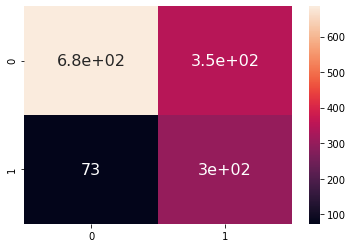

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_true=y_test,y_pred=yhat_tree)
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True,annot_kws={"size":16})
plt.show()

3. Logistic Regression Model Training

In [27]:
#Logistic Regression Model
X = np.asarray(df_churn[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','Contract','MonthlyCharges','TotalCharges']])
y=df_churn['Churn']
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.00955867, -0.43991649,  1.03453023, -0.65401193, -1.27744458,
        -3.05401039,  2.11053526, -1.18323364, -0.8282069 , -1.16032292,
        -0.99266722],
       [ 0.99053183, -0.43991649, -0.96662231, -0.65401193,  0.06632742,
         0.32743831, -0.93828021, -1.18323364,  0.37127103, -0.25962894,
        -0.17219813],
       [ 0.99053183, -0.43991649, -0.96662231, -0.65401193, -1.23672422,
         0.32743831, -0.93828021, -1.18323364, -0.8282069 , -0.36266036,
        -0.95812162],
       [ 0.99053183, -0.43991649, -0.96662231, -0.65401193,  0.51425142,
        -3.05401039,  2.11053526, -1.18323364,  0.37127103, -0.74653546,
        -0.19370641],
       [-1.00955867, -0.43991649, -0.96662231, -0.65401193, -1.23672422,
         0.32743831, -0.93828021,  0.17225018, -0.8282069 ,  0.19736523,
        -0.93892962]])

In [28]:
#Spliting the data and applying undersampling
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import warnings
from sklearn import preprocessing
warnings.simplefilter(action='ignore', category=FutureWarning)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=4)
print("Before undersampling: ", X_train.shape, y_train.shape)
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print("After undersampling: ", X_train_under.shape,y_train_under.shape)

Before undersampling:  (5634, 11) (5634,)
After undersampling:  (2990, 11) (2990,)


Train the Logistic regression Model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LogReg = LogisticRegression(C=0.09,solver='liblinear').fit(X_train_under,y_train_under)


Prediction with a Logistic Regression Model

In [78]:
yhat_log = LogReg.predict(X_test)
yhat_log[0:5]

array([1, 0, 0, 1, 1])

In [79]:
yhat_proba = LogReg.predict_proba(X_test)
yhat_proba

array([[0.47847174, 0.52152826],
       [0.61476862, 0.38523138],
       [0.68479284, 0.31520716],
       ...,
       [0.91902598, 0.08097402],
       [0.9190606 , 0.0809394 ],
       [0.86067673, 0.13932327]])

Logistic Regression Model Evaluation

In [81]:
#Evaluation of the Prediction by Logistic Regression Model
print('Train accuracy %s' % LogReg.score(X_train_under, y_train_under)) 
print('Test accuracy %s' % accuracy_score(yhat_log, y_test))
print("ROC AUC score for undersampled data: ", roc_auc_score(y_test, yhat_log))
print("Jaccard score for the undersampled data:",jaccard_score(y_test,yhat_log,pos_label=0))
print('Residual Sum of Squares(MSE):%.2f'%np.mean(yhat_log - y_test)**2)
print('R2_score: %.2f'%r2_score(y_test,yhat_log))
print("F1_score: %.2f"%f1_score(y_test,yhat_log,average='weighted'))
print(classification_report(y_test,yhat_log))

Train accuracy 0.7598662207357859
Test accuracy 0.716820440028389
ROC AUC score for undersampled data:  0.7346728151075977
Jaccard score for the undersampled data: 0.64375
Residual Sum of Squares(MSE):0.03
R2_score: -0.45
F1_score: 0.73
              precision    recall  f1-score   support

           0       0.89      0.70      0.78      1035
           1       0.48      0.77      0.59       374

    accuracy                           0.72      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.78      0.72      0.73      1409



In [32]:
from sklearn.metrics import log_loss
log_loss(y_test,yhat_proba)

0.5263551077902293

In [33]:
confusion_matrix = confusion_matrix(y_true=y_test,y_pred=yhat2)
confusion_matrix

array([[721, 314],
       [ 85, 289]])

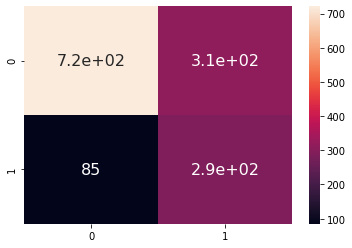

In [34]:
sns.heatmap(confusion_matrix,annot=True,annot_kws={"size":16})
plt.show()